In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**Exercises**

0. Replicate the model pictured in the TensorFlow Playground diagram below using TensorFlow code. Compile it using the Adam optimizer, binary crossentropy loss and accuracy metric. Once it's compiled check a summary of the model.

1. Create a classification dataset using Scikit-Learn's make_moons() function, visualize it and then build a model to fit it at over 85% accuracy.

2. Create a function (or write code) to visualize multiple image predictions for the fashion MNIST at the same time. Plot at least three different images and their prediciton labels at the same time. Hint: see the classifcation tutorial in the TensorFlow documentation for ideas.

3. Recreate TensorFlow's softmax activation function in your own code. Make sure it can accept a tensor and return that tensor after having the softmax function applied to it.

4. Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.

5. Make a function to show an image of a certain class of the fashion MNIST dataset and make a prediction on it. For example, plot 3 images of the T-shirt class with their predictions.

In [2]:
# Exercise 0
"""
tf.random_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid") # Since it's binary classification 1 output neuro and sigmoid activation.
])

model_1.compile(loss=tf.keras.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_1.fit(X_train, y_train, epochs=10)
model_1.evaluate(X_test, y_test)
"""

'\ntf.random_seed(42)\n\nmodel_1 = tf.keras.Sequential([\n    tf.keras.layers.Dense(6, activation="relu"),\n    tf.keras.layers.Dense(6, activation="relu"),\n    tf.keras.layers.Dense(6, activation="relu"),\n    tf.keras.layers.Dense(6, activation="relu"),\n    tf.keras.layers.Dense(6, activation="relu"),\n    tf.keras.layers.Dense(1, activation="sigmoid") # Since it\'s binary classification 1 output neuro and sigmoid activation.\n])\n\nmodel_1.compile(loss=tf.keras.BinaryCrossentropy(),\n                optimizer=tf.keras.optimizers.Adam(),\n                metrics=["accuracy"])\n\nmodel_1.fit(X_train, y_train, epochs=10)\nmodel_1.evaluate(X_test, y_test)\n'

# **Exercise 1**: Create a classification dataset using Scikit-Learn's make_moons() function, visualize it and then build a model to fit it at over 85% accuracy.

In [3]:

"""
The make_moons() function is a utility function provided by the scikit-learn library in Python.
It is used for generating a two-dimensional dataset containing two interleaving half circles,
commonly known as the "moons" dataset. This dataset is often used for binary classification tasks,
where the goal is to separate the two moon-shaped clusters.

The make_moons() function generates synthetic data points that form two half-moon shapes, each
containing a specified number of samples. These samples are labeled with integers representing
the two classes, typically 0 and 1.
"""
from sklearn.datasets import make_moons

# Noise allows you to control the amount of variability or randomness present in the generated dataset,
# by setting a non-zero noise level, you introduce random perturbations to the data points. .
X, y = make_moons(n_samples=1000, noise=0.1)
print(X.shape, y.shape)

moons = pd.DataFrame({"col1":X[:, 0], "col2":X[:, 1], "label":y})
moons.head()

(1000, 2) (1000,)


,col1,col2,label
0,-0.618043,0.890191,0
1,-0.092477,0.283103,1
2,0.129875,1.050461,0
3,-0.506333,0.910475,0
4,0.865558,-0.481853,1


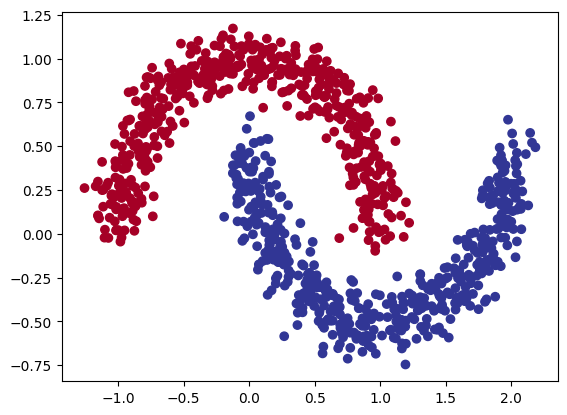

In [4]:
# Visualizing with a plot

"""
Two Features: The "moons" dataset generated by make_moons() contains two features
(also known as attributes or dimensions). Each row of the X array represents a
data point with two feature values, X[i, 0] and X[i, 1]. These feature values
represent the coordinates of each data point in the 2D plane.

Class Labels as Colors: The c parameter of plt.scatter() is set to y, which means
we use the class labels (y) to determine the colors of the data points. Each class
(0 or 1) will be associated with a specific color, allowing us to distinguish
between the two classes in the plot.
"""

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)


In [5]:
from sklearn.model_selection import train_test_split

#Splitting into the test set and training set.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Checking shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((750, 2), (250, 2), (750,), (250,))

In [6]:
# Building the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_2.fit(X_train, y_train, epochs=15)

Epoch 1/15
24/24 [==============================] - 1s 2ms/step - loss: 0.6590 - accuracy: 0.5560
Epoch 2/15
24/24 [==============================] - 0s 3ms/step - loss: 0.6028 - accuracy: 0.8040
Epoch 3/15
24/24 [==============================] - 0s 2ms/step - loss: 0.5498 - accuracy: 0.8267
Epoch 4/15
24/24 [==============================] - 0s 2ms/step - loss: 0.4984 - accuracy: 0.8480
Epoch 5/15
24/24 [==============================] - 0s 2ms/step - loss: 0.4572 - accuracy: 0.8667
Epoch 6/15
24/24 [==============================] - 0s 2ms/step - loss: 0.4166 - accuracy: 0.8707
Epoch 7/15
24/24 [==============================] - 0s 2ms/step - loss: 0.3742 - accuracy: 0.8853
Epoch 8/15
24/24 [==============================] - 0s 2ms/step - loss: 0.3306 - accuracy: 0.8907
Epoch 9/15
24/24 [==============================] - 0s 2ms/step - loss: 0.2909 - accuracy: 0.8973
Epoch 10/15
24/24 [==============================] - 0s 3ms/step - loss: 0.2586 - accuracy: 0.9040
Epoch 11/15
24/24 [

313/313 [==============================] - 1s 1ms/step
doing binary classifcation...


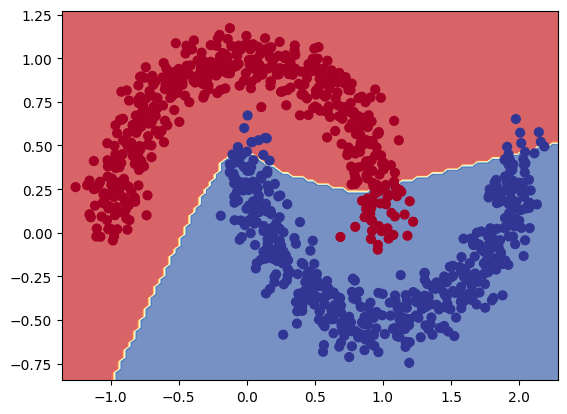

In [7]:
# Creating a function to visualize how our model is performing...
def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X.

    Arguments:
      model --> the trained model
      X --> the feature data (numpy array)
      y --> the truth labels

    Returns:
      A visualization of how our model is performing (fitting with our data)

    """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))

    # Create X values (we're going to predict on all of these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

    # Make predictions using the trained model
    y_pred = model.predict(x_in)

    # Check for multi-class
    if len(y_pred[0]) > 1:
      print("doing multiclass classification...")
      # We have to reshape our predictions to get them ready for plotting
      y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
      print("doing binary classifcation...")
      y_pred = np.round(y_pred).reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

plot_decision_boundary(model_2, X, y)

# **Exercise 3**: Recreate TensorFlow's softmax activation function in your own code. Make sure it can accept a tensor and return that tensor after having the softmax function applied to it. Note: we do this first and then we do, 2, 4 and 5 together.

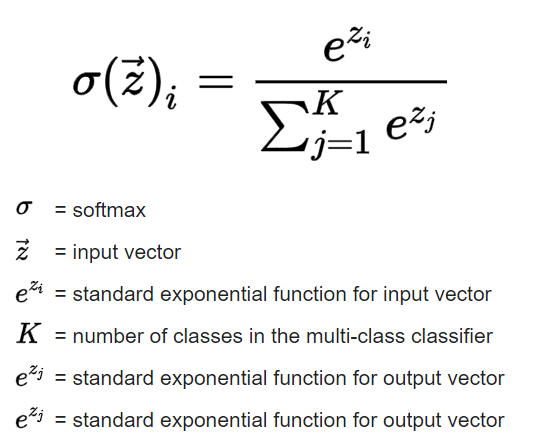

In [8]:
def softmax_activation(x):
    """
    Implements the softmax activation function. Takes a tensor x as an input and
    returns the same tensor with the softmax activation function applied to.
    """
    # We need to make our tensor of type float to avoid error int32/ int64 etc..
    x = tf.cast(x, dtype=tf.float32)

    # Calculate the exponential of the input vector
    exp_values = tf.exp(x)

    # We sum the exponentials of all the input values. (This sum is used to normalize the exponentials
    # and obtain the final softmax probabilities for each class.)
    sum_exp_values = tf.math.reduce_sum(exp_values, axis=0)

    # Divide each exponential value by the sum
    softmax_probs = exp_values / sum_exp_values

    return softmax_probs


# Creating sample tensor
tensor = tf.constant([[1, 2, 3, 6],
                     [2, 4, 5, 6],
                     [3, 8, 7, 6]] )

# Testing function
softmax_activation(tensor)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0.09003057, 0.00242826, 0.01587624, 0.3333333 ],
       [0.24472848, 0.01794253, 0.11731043, 0.3333333 ],
       [0.66524094, 0.97962916, 0.86681336, 0.33333334]], dtype=float32)>

In [9]:
tf.nn.softmax(tf.cast(tensor, dtype=tf.float32))

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0.00626879, 0.01704033, 0.04632042, 0.93037045],
       [0.01203764, 0.08894681, 0.24178252, 0.657233  ],
       [0.00446236, 0.6622724 , 0.2436364 , 0.08962882]], dtype=float32)>

**Explanation of the *axis* parameter in tf.math.reduce_sum()**: When performing operations like summation along a specific axis, you're essentially collapsing the values along that axis while keeping the values along other axes unchanged.

For example, consider a 2D matrix where axis 0 represents rows and axis 1 represents columns:

Summing along axis 0 would sum the values in each column, resulting in a new 1D tensor with values equal to the column sums.
Summing along axis 1 would sum the values in each row, resulting in a new 1D tensor with values equal to the row sums.

When you apply the softmax activation function, you need to compute the exponentials of the input elements and then normalize them by dividing each exponential by the sum of all exponentials. The key point here is that *the sum should be computed along the same axis across which you want to normalize the values.*

In your custom softmax_activation function, you initially calculated the exponential values correctly. However, when you used tf.math.reduce_sum(exp_values), you computed the sum of all exponentials across all axes (i.e., you summed up all the values in the tensor). This caused the normalization to be incorrect because you were dividing each exponential value by the sum across all values.

By using the axis parameter and specifying the correct axis along which you want to normalize the values, you ensure that the exponentials are summed only along that axis. This produces the desired effect of summing the exponentials for each set of values that need to be normalized together.

**In the tf.nn.softmax() function, the reduce_sum operation is done along the specified axis, which is typically the last axis (axis -1) of the input tensor. This axis is referred to as the "class axis" in the context of softmax.**

The softmax operation is typically performed along the last axis (axis -1) of the input tensor because it's often used in the context of multi-class classification problems where each element along the last axis represents a class or category.

In many machine learning tasks, especially classification tasks, the input tensor is organized such that each row corresponds to an example, and each column corresponds to a class. The last axis is often the class axis. For example, in an image classification problem with 10 classes, the input tensor might have a shape of (batch_size, num_classes).

When applying the softmax operation, you want to calculate the probabilities of each class for each example in the batch. By performing the reduce_sum operation along the class axis (last axis), you are essentially summing up the exponentials of each class's score for each example. This sum is then used to normalize the scores into probabilities.

Performing the reduce_sum along the last axis ensures that the summation is done independently for each example, effectively treating each example as a separate entity with its own set of class scores.



# **Exercise 4:** Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.

In [10]:
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

4422102/4422102 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [26]:
"""
tf.keras.layers.Flatten(input_shape=(28, 28)): This layer converts the 2D input
of shape (batch_size, 28, 28) into a 1D tensor of shape (batch_size, 28 * 28) =
(batch_size, 784). It "flattens" the input image into a long vector, where each
pixel becomes a separate feature.
"""

model_4 = tf.keras.Sequential([
    # We had to reshape the input layer from 28x28 to 784, the Flatten layer does this for us.
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

"""
You can solve the issue by using SparseCategoricalCrossentropy() because it's designed
to handle integer-encoded target labels directly, without the need for explicit
one-hot encoding. This loss function is particularly useful in cases where you have
integer labels and you don't want to convert them into one-hot encoded vectors.

The SparseCategoricalCrossentropy() loss function expects the target labels to be
integers representing the class indices, and it internally handles the conversion
to one-hot encoded format.
"""
model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_4.fit(train_data, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 2ms/step - loss: 1.4916 - accuracy: 0.4990
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9678 - accuracy: 0.6142
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6533 - accuracy: 0.7634
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5581 - accuracy: 0.7971
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5041 - accuracy: 0.8233
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4608 - accuracy: 0.8406
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4392 - accuracy: 0.8468
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4094 - accuracy: 0.8580
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4007 - accuracy: 0.8597
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.385

In [27]:
# Evaluating our model
model_4.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.4443 - accuracy: 0.8508


[0.4443109333515167, 0.8507999777793884]

In [13]:
# Plotting the confusion matrix (Note that we can do it only with confusion_matrix,
# but we make a function so that we can use a plot with color and labels to be more
# understandable)
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
    """Makes a labelled confusion matrix comparing predictions and ground truth labels.

    If classes is passed, confusion matrix will be labelled, if not, integer class values
    will be used.

    Args:
      y_true: Array of truth labels (must be same shape as y_pred).
      y_pred: Array of predicted labels (must be same shape as y_true).
      classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
      figsize: Size of output figure (default=(10, 10)).
      text_size: Size of output figure text (default=15).

    Returns:
      A labelled confusion matrix plot comparing y_true and y_pred.

    Example usage:
      make_confusion_matrix(y_true=test_labels, # ground truth test labels
                            y_pred=y_preds, # predicted labels
                            classes=class_names, # array of class label names
                            figsize=(15, 15),
                            text_size=10)
    """
    # Create the confustion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
    n_classes = cm.shape[0] # find the number of classes we're dealing with

    # Plot the figure and make it pretty
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
    fig.colorbar(cax)

    # Are there a list of classes?
    if classes:
      labels = classes
    else:
      labels = np.arange(cm.shape[0])

    # Label the axes
    ax.set(title="Confusion Matrix",
          xlabel="Predicted label",
          ylabel="True label",
          xticks=np.arange(n_classes), # create enough axis slots for each class
          yticks=np.arange(n_classes),
          xticklabels=labels, # axes will labeled with class names (if they exist) or ints
          yticklabels=labels)

    # Make x-axis labels appear on bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Set the threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)


313/313 [==============================] - 0s 1ms/step


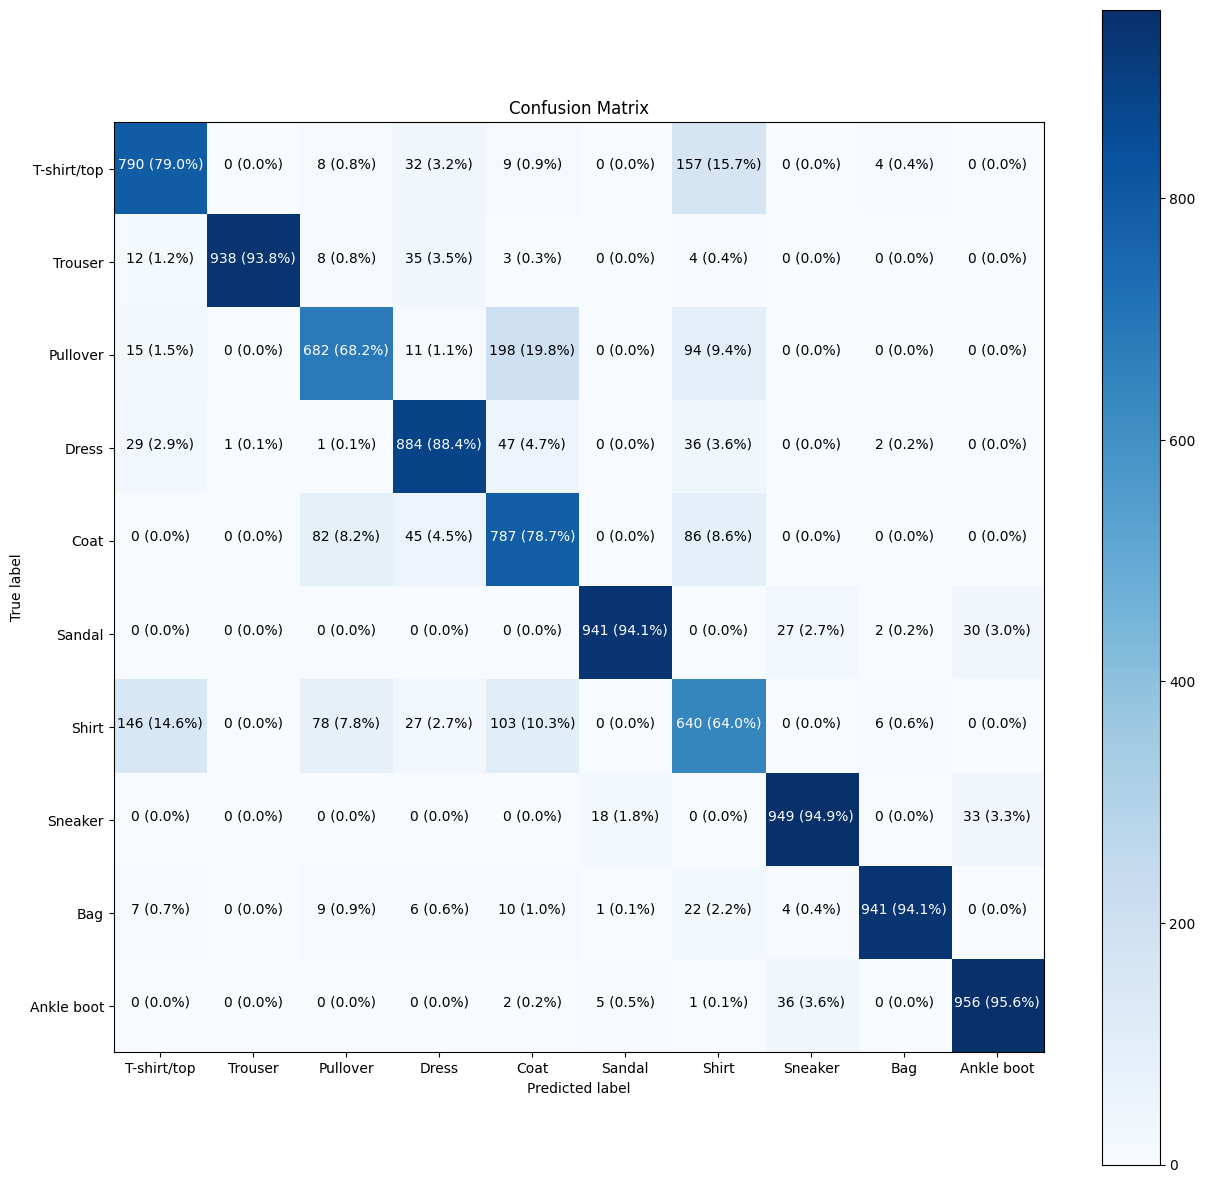

In [28]:
""" Extracting the information needed in order to run make_confusion_matrix"""

# Calculates the predicted class probabilities for each example. Each column
# represents the predicted probability of that example belonging to a specific class.
y_probs = model_4.predict(test_data)

# Converts all of the predictions from probabilities to labels. argmax() returns
# the indices of the max elements along the first axis (rows) for each example.
y_preds = y_probs.argmax(axis=1)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

""" Plotting """
make_confusion_matrix(y_true=test_labels, y_pred=y_preds, classes=class_names,
                      figsize=(15, 15), text_size=10)

# **Exercise 2**: Create a function (or write code) to visualize multiple image predictions for the fashion MNIST at the same time. Plot at least three different images and their prediciton labels at the same time. Hint: see the classifcation tutorial in the TensorFlow documentation for ideas.

In [15]:
def visualize_image_predictions(model, images, labels, class_names):
  """
  Visualizes 4 random images from the fashion MNIST dataset and their corresponding
  predictions made from the model.
  """
  # Randomly select 4 unique indices
  selected_indices = np.random.choice(len(test_data), size=4, replace=False)

  # We select the randomly chosen images and their corresponding labels.
  selected_images = test_data[selected_indices]
  selected_labels = test_labels[selected_indices]
  # We have to reshape to get into right size for model
  #selected_images = selected_images.reshape(1, 28, 28)

  # We predict and convert the probabilities to the predicted labels
  predictions = model_4.predict(selected_images)
  predicted_labels = predictions.argmax(axis=1)


  # Plot the selected images along with true and predicted labels
  plt.figure(figsize=(10, 6))
  for i in range(4):
      plt.subplot(2, 2, i + 1)
      plt.imshow(selected_images[i], cmap=plt.cm.binary)

      if predicted_labels[i] != selected_labels[i]:
        color = "red"
      else:
        color = "green"
      # We check the true data and the predicted data of each image to use it for our xlabel.
      pred_probs = predictions[i]
      pred_label = class_names[predicted_labels[i]]
      true_label = class_names[selected_labels[i]]

      plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label, 100 * tf.reduce_max(pred_probs), true_label), color=color)


1/1 [==============================] - 0s 15ms/step


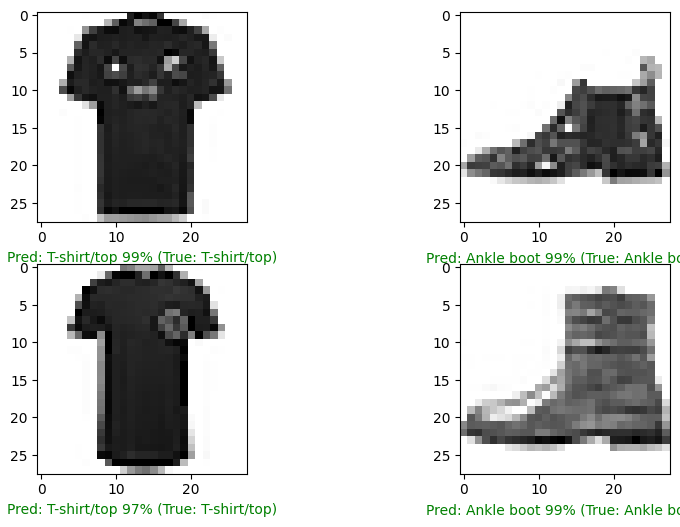

In [16]:
visualize_image_predictions(model=model_4,images=test_data,labels=test_labels,class_names=class_names)

# **Exercise 5**: Make a function to show an image of a certain class of the fashion MNIST dataset and make a prediction on it. For example, plot 3 images of the T-shirt class with their predictions.

In [19]:
preds = model_4.predict(test_data)

313/313 [==============================] - 1s 2ms/step


In [21]:
# Below functions are from TensorFlow Tutorials (https://www.tensorflow.org/tutorials/keras/classification#verify_predictions)

def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
      color = 'blue'
    else:
      color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                  100*np.max(predictions_array),
                                  class_names[true_label]),
                                  color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

def plot_image_class():
    """
    Shows an image of a certain class of the dataset and makes a prediction on it.
    """
    # Plot the first X test images, their predicted labels, and the true labels.
    # Color correct predictions in blue and incorrect predictions in red.
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))

    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, preds[i], test_labels, test_data)
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, preds[i], test_labels)

    plt.tight_layout()
    plt.show()


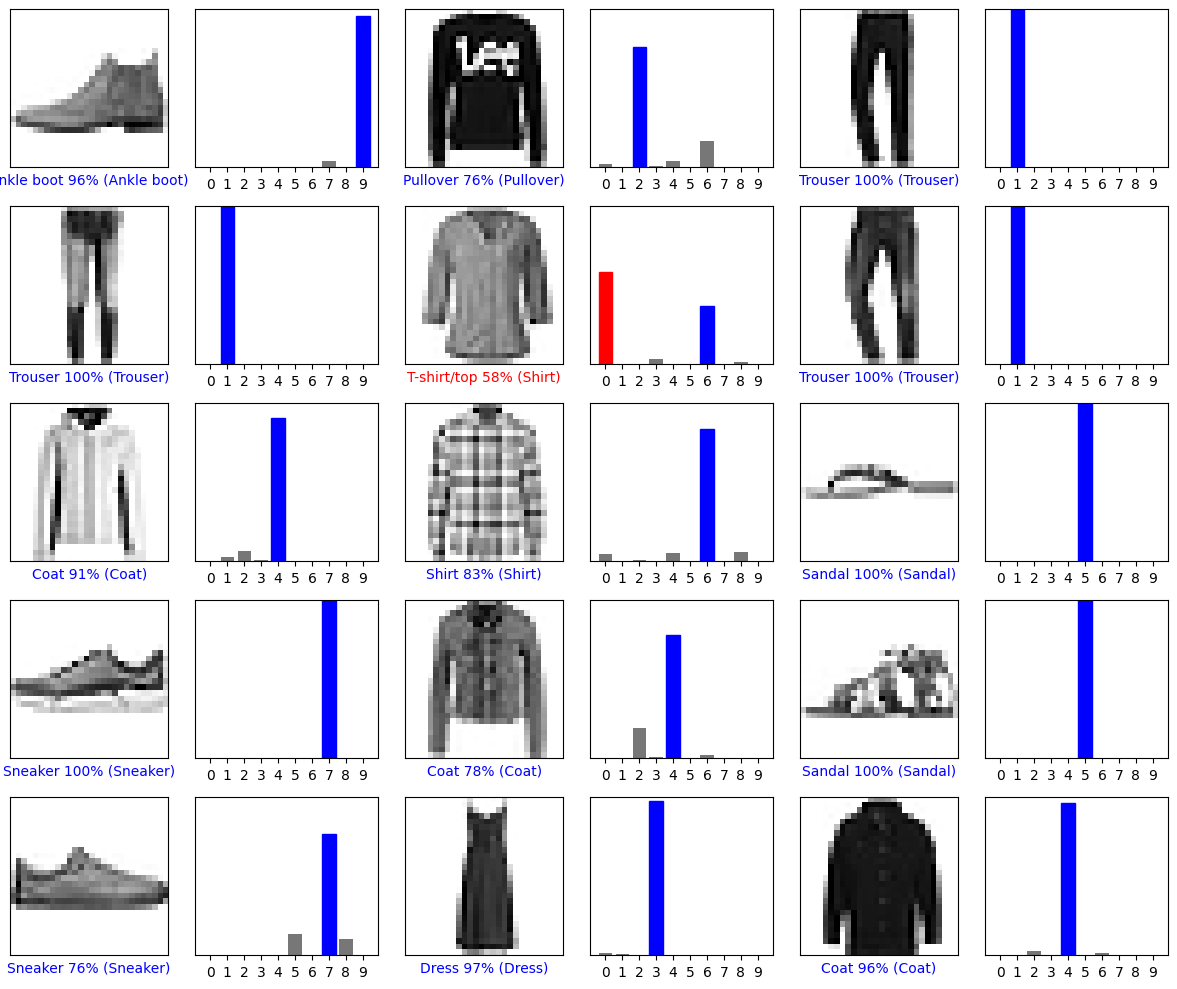

In [22]:
plot_image_class()